In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense
from keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
warnings.filterwarnings('ignore')

(42000, 785)
(28000, 784)


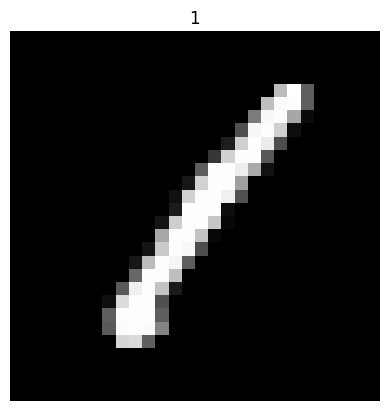

In [3]:
train = pd.read_csv("/content/drive/MyDrive/Semester5/Experiment9/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Semester5/Experiment9/test.csv")

print(train.shape)    # (42000, 785)
print(test.shape)     # (28000, 784)

plt.imshow(train.iloc[0, 1:].values.reshape(28,28), cmap='gray')
plt.title(train.iloc[0, 0])
plt.axis('off')
plt.show()

In [9]:
X_train = train.drop('label', axis=1)/255.0
X_train = X_train.values.reshape(-1, 28, 28, 1)
Y_train = tf.keras.utils.to_categorical(train['label'], num_classes=10)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(
    X_train, Y_train, test_size=0.1, random_state=2
)


In [13]:
model = Sequential([
    Conv2D(8, (5, 5), padding='Same', activation='relu', input_shape=(28, 28, 1)),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(16, (3, 3), padding='Same', activation='relu'),
    MaxPool2D(pool_size=(2, 2), strides=(2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),

    Dense(10, activation='softmax')
])


In [16]:
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
datagen = ImageDataGenerator(
    rotation_range=5,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)
datagen.fit(X_train)


In [23]:
batch_size = 250
epochs = 15
history = model.fit(
    datagen.flow(X_train, Y_train, batch_size=batch_size),
    epochs=epochs,
    validation_data=(X_val, Y_val),
    steps_per_epoch=X_train.shape[0] // batch_size
)

Epoch 1/15
151/151 ━━━━━━━━━━━━━━━━━━━━ 35s 234ms/step - accuracy: 0.6316 - loss: 1.0910 - val_accuracy: 0.9476 - val_loss: 0.1895
Epoch 2/15
151/151 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.8320 - loss: 0.5042 - val_accuracy: 0.9474 - val_loss: 0.1883
Epoch 3/15
151/151 ━━━━━━━━━━━━━━━━━━━━ 37s 229ms/step - accuracy: 0.8530 - loss: 0.4537 - val_accuracy: 0.9564 - val_loss: 0.1343
Epoch 4/15
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9320 - loss: 0.2155 - val_accuracy: 0.9562 - val_loss: 0.1332
Epoch 5/15
151/151 ━━━━━━━━━━━━━━━━━━━━ 41s 236ms/step - accuracy: 0.8920 - loss: 0.3351 - val_accuracy: 0.9633 - val_loss: 0.1089
Epoch 6/15
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9400 - loss: 0.1977 - val_accuracy: 0.9650 - val_loss: 0.1081
Epoch 7/15
151/151 ━━━━━━━━━━━━━━━━━━━━ 36s 238ms/step - accuracy: 0.9117 - loss: 0.2854 - val_accuracy: 0.9669 - val_loss: 0.0964
Epoch 8/15
151/151 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9280 - loss: 0.2273 - va

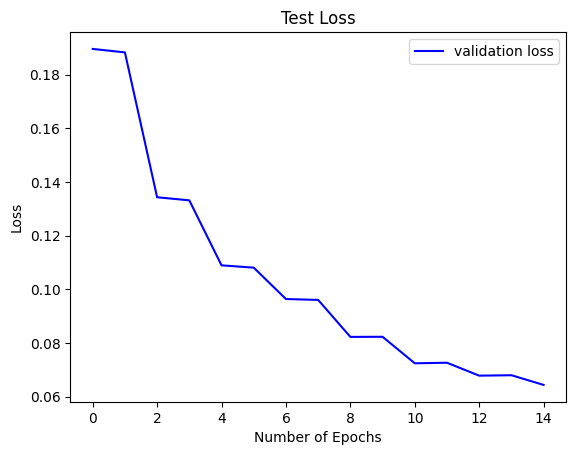

132/132 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step


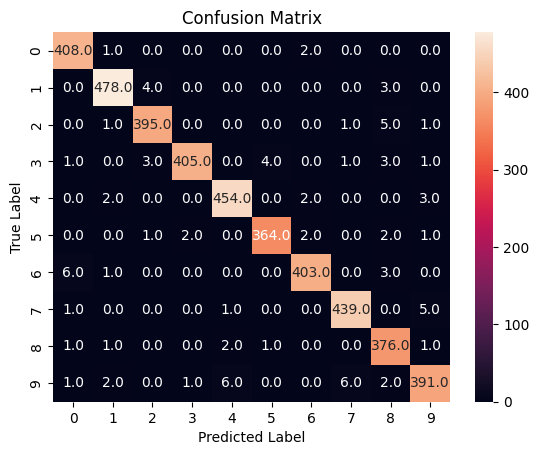

In [24]:
plt.plot(history.history['val_loss'], color='b', label='validation loss')
plt.title('Test Loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Y_pred = model.predict(X_val)
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(Y_val, axis=1)

from sklearn.metrics import confusion_matrix
mtx = confusion_matrix(Y_true, Y_pred_classes)
sns.heatmap(mtx, annot=True, fmt='.1f')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [25]:
test = test / 255.0
test = test.values.reshape(-1, 28, 28, 1)
results = model.predict(test)
results = np.argmax(results, axis=1)
submission = pd.DataFrame({'Label': results})
submission.to_csv('submission.csv', index=False)


875/875 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step


Saving exp9_test1.jpg to exp9_test1 (2).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


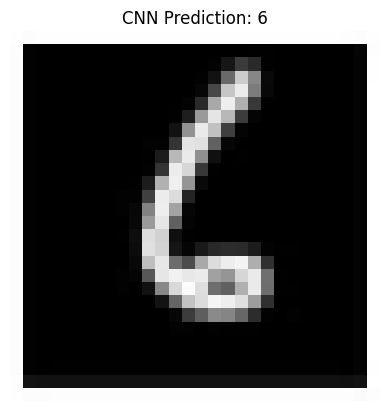

Predicted class: 6


In [30]:
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

uploaded = files.upload()
img_path = list(uploaded.keys())[0]
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
img_resized = cv2.resize(img, (28, 28))
img_resized = img_resized.astype('float32') / 255.0
img_reshaped = img_resized.reshape(1, 28, 28, 1)

# Apply data augmentation to the uploaded image
img_augmented = datagen.flow(img_reshaped, batch_size=1)[0]

pred_prob = model.predict(img_augmented)
pred_class = np.argmax(pred_prob, axis=1)[0]

plt.imshow(img_resized, cmap='gray')
plt.title(f'CNN Prediction: {pred_class}')
plt.axis('off')
plt.show()
print(f'Predicted class: {pred_class}')

Saving exp9_test2 to exp9_test2 (2)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


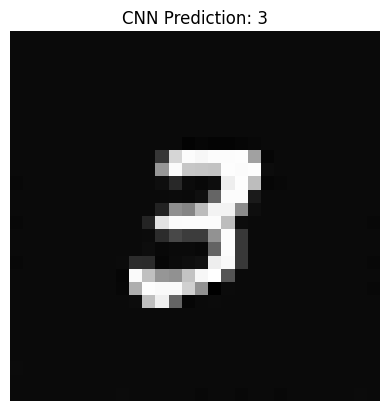

Predicted class: 3


In [34]:
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

uploaded = files.upload()
img_path = list(uploaded.keys())[0]
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
img_resized = cv2.resize(img, (28, 28))
img_resized = img_resized.astype('float32') / 255.0
img_reshaped = img_resized.reshape(1, 28, 28, 1)

# Apply data augmentation to the uploaded image
img_augmented = datagen.flow(img_reshaped, batch_size=1)[0]

pred_prob = model.predict(img_augmented)
pred_class = np.argmax(pred_prob, axis=1)[0]

plt.imshow(img_resized, cmap='gray')
plt.title(f'CNN Prediction: {pred_class}')
plt.axis('off')
plt.show()
print(f'Predicted class: {pred_class}')